In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [112]:
df=pd.read_csv("rating_short.csv")

In [113]:
df

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200
...,...,...,...,...
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0,1347321600
78241,AMXTPQY23TN07,B004RB8CT4,4.0,1367539200
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0,1375315200
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0,1392768000


### Data analysis

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [116]:
df.duplicated().sum()

0

In [117]:
df.isnull().sum()

userid       0
productid    0
rating       0
date         0
dtype: int64

In [118]:
df.describe()

,rating,date
count,78245.000000,7.824500e+04
mean,4.006454,1.338128e+09
std,1.385342,6.891994e+07
min,1.000000,9.320832e+08
25%,3.000000,1.315008e+09
50%,5.000000,1.360800e+09
75%,5.000000,1.386029e+09
max,5.000000,1.406074e+09


In [119]:
# rating levels
Levels=sorted(df.rating.unique())
Levels

[1.0, 2.0, 3.0, 4.0, 5.0]

In [120]:
# No.of customers in the data
df.userid.nunique()

76430

In [121]:
# No. of products in the data
df.productid.nunique()

40228

In [122]:
# mostfrequently rated product
print(df.productid.value_counts().idxmax())
print(df.productid.value_counts().max())

B0074BW614
201


In [123]:
# most frequently rating customer 
print(df.userid.value_counts().idxmax())
print(df.userid.value_counts().max())

A3LGT6UZL99IW1
8


In [124]:
# Product rated per customer
product_rated_per_user=df.groupby('userid')['productid'].count().sort_values(ascending=False)
product_rated_per_user

userid
A1ODOGXEYECQQ8    8
A3LGT6UZL99IW1    8
ADLVFFE4VBT8      7
ARBKYIVNYWK3C     7
AVPNQUVZWMDSX     6
                 ..
A29MJ8QKQIQHMW    1
A29MITUY30D61W    1
A29MIS41KQ21E8    1
A29MI1DJR2JYU2    1
AZZYYC8OX8ELM     1
Name: productid, Length: 76430, dtype: int64

In [125]:
# rating reflecting overall performance
df.rating.value_counts()

rating
5.0    43360
4.0    14878
1.0     9128
3.0     6287
2.0     4592
Name: count, dtype: int64

In [126]:
# average rating per customer
Av_user_rating=df.groupby('userid')['rating'].mean()
Av_user_rating

userid
A000063614T1OE0BUSKUT    5.0
A0009478CBXKUCALUC7U     5.0
A00101847G3FJTWYGNQA     5.0
A00229361XSNMXZ0NHCP0    3.0
A00261423251DFHHYVST9    5.0
                        ... 
AZZXSM5W248P8            4.0
AZZXYB7CMAC6Z            5.0
AZZY7T62AF17E            5.0
AZZYW4YOE1B6E            5.0
AZZYYC8OX8ELM            5.0
Name: rating, Length: 76430, dtype: float64

### Correcting datatype

In [128]:
df.columns

Index(['userid', 'productid', 'rating', 'date'], dtype='object')

In [129]:
df["date"]=pd.to_datetime(df.date,unit="s")
df["rating"]=df.rating.astype("int8")

In [130]:
# timeline of data
print(df.date.min())
print(df.date.max())

1999-07-16 00:00:00
2014-07-23 00:00:00


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userid     78245 non-null  object        
 1   productid  78245 non-null  object        
 2   rating     78245 non-null  int8          
 3   date       78245 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int8(1), object(2)
memory usage: 1.9+ MB


### Visual analysis

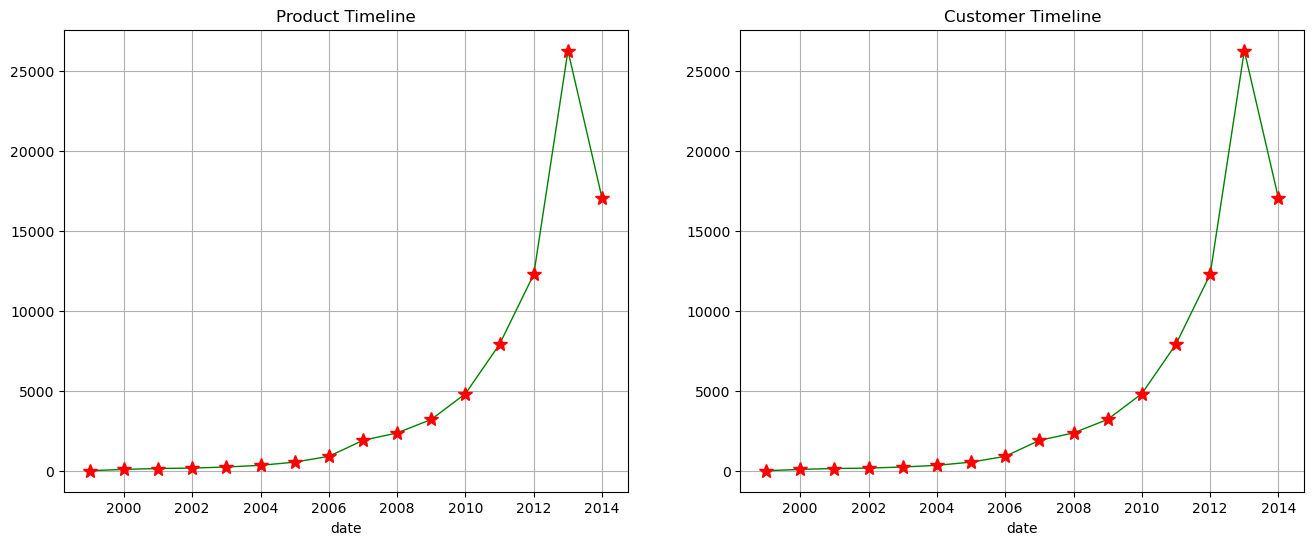

In [133]:
plt.figure(figsize=(16,6))
plt.tight_layout()

plt.subplot(1,2,1)
plt.ticklabel_format(style="plain",axis="y")
df.groupby(df['date'].dt.year)['productid'].count().plot(color="green",linewidth=1.0,marker='*',
                                                   markeredgecolor="red",markerfacecolor="red",markersize=10)
plt.grid(True)
plt.title ("Product Timeline")

plt.subplot(1,2,2)
plt.ticklabel_format(style="plain",axis="y")
df.groupby(df['date'].dt.year)['userid'].count().plot(color="green",linewidth=1.0,marker='*',
                                                 markeredgecolor="red",markerfacecolor="red",markersize=10)
plt.grid(True)
plt.title ("Customer Timeline")

plt.show()

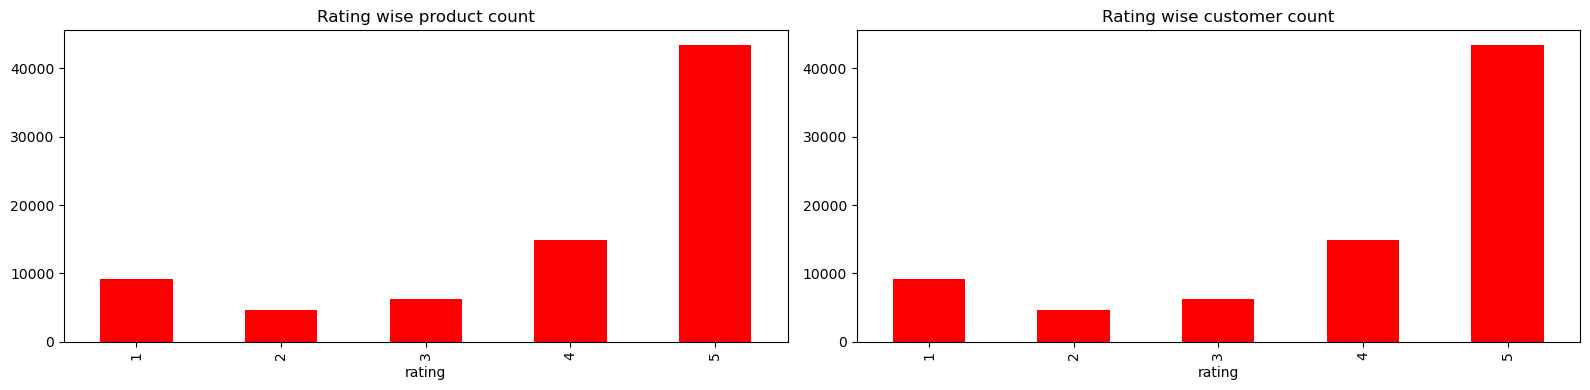

In [134]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.ticklabel_format(style="plain",axis="y")
df.productid.groupby(df["rating"]).count().plot(kind="bar",color="red")
plt.title("Rating wise product count")

plt.subplot(1,2,2)
plt.ticklabel_format(style="plain",axis="y")
df.userid.groupby(df["rating"]).count().plot(kind="bar",color="red")
plt.title("Rating wise customer count")

plt.tight_layout()
plt.show()

Rating distribution Curve Skew =  -1.1971115566660435


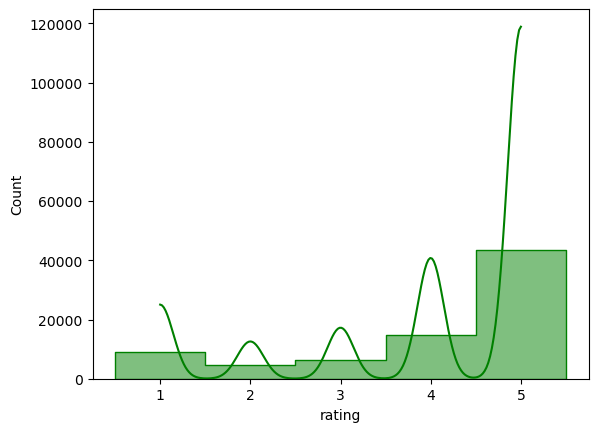

In [135]:
sns.histplot(df.rating,bins=5,discrete=True,kde=True,color="Green",binwidth=0.5,element='step')
plt.ticklabel_format(style="plain",axis="y")
# Its not a normal distribution , extreme left skew
print("Rating distribution Curve Skew = ",df.rating.skew())
# sns.countplot(x=rat.rating)

<Axes: ylabel='rating'>

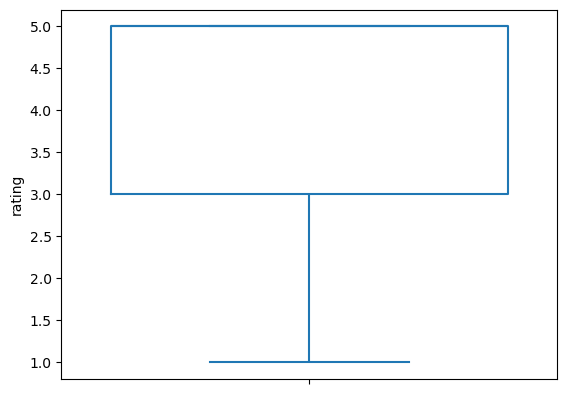

In [136]:
sns.boxplot(df.rating,fill=False)

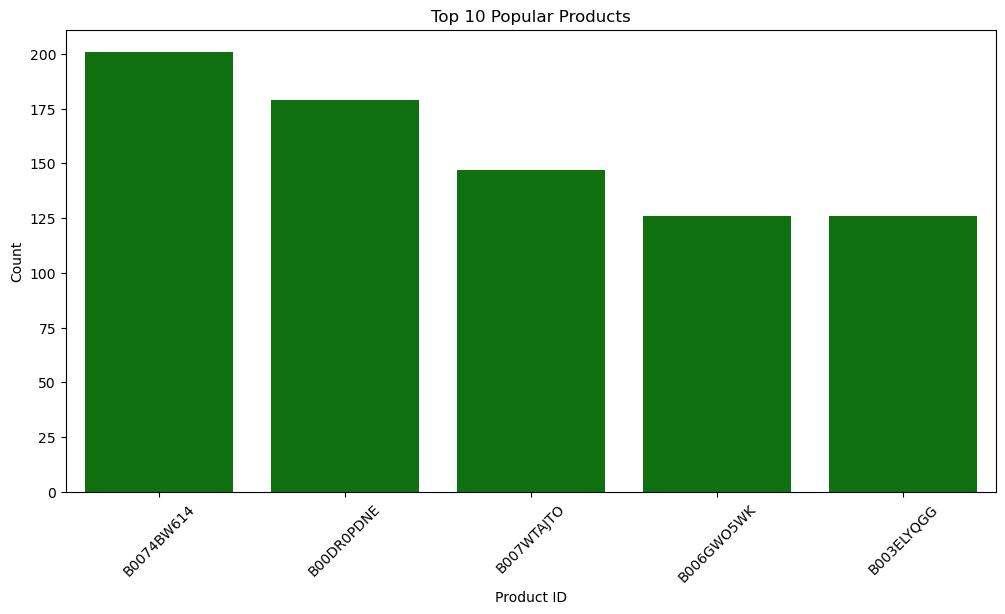

In [137]:
# Top recommended products
popular_products = df['productid'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products.index, y=popular_products.values,color="green")
plt.title("Top 10 Popular Products")
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [138]:
from sklearn.preprocessing import LabelEncoder

In [139]:
LE_uid=LabelEncoder()
LE_pid=LabelEncoder()
df["userid"]=LE_uid.fit_transform(df.userid)
df["productid"]=LE_pid.fit_transform(df.productid)
df

,userid,productid,rating,date
0,19800,6501,5,2008-01-08
1,68377,14346,4,2012-03-10
2,3273,29591,5,2013-01-20
3,22312,31598,1,2013-11-25
4,57219,27361,5,2014-06-17
...,...,...,...,...
78240,16932,16243,5,2012-09-11
78241,69246,22851,4,2013-05-03
78242,8768,14414,2,2013-08-01
78243,38853,22565,5,2014-02-19


### Time Series

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings('ignore')

In [142]:
rat=pd.read_csv("rating_short.csv")

In [143]:
rat["date"]=pd.to_datetime(rat["date"],unit="s")
rat["rating"]=rat.rating.astype("int32")

In [144]:
latest_date=rat["date"].max()
current_date=pd.Timestamp.today()
date_shift=current_date-latest_date
rat["date"]=rat["date"]+date_shift

In [145]:
rat=rat[["date","rating"]]

In [146]:
rat.set_index(rat.columns[0],inplace=True)

In [147]:
rat=rat.resample("D").mean()

In [148]:
rat=rat.fillna(rat.rating.mean())

<Axes: xlabel='date'>

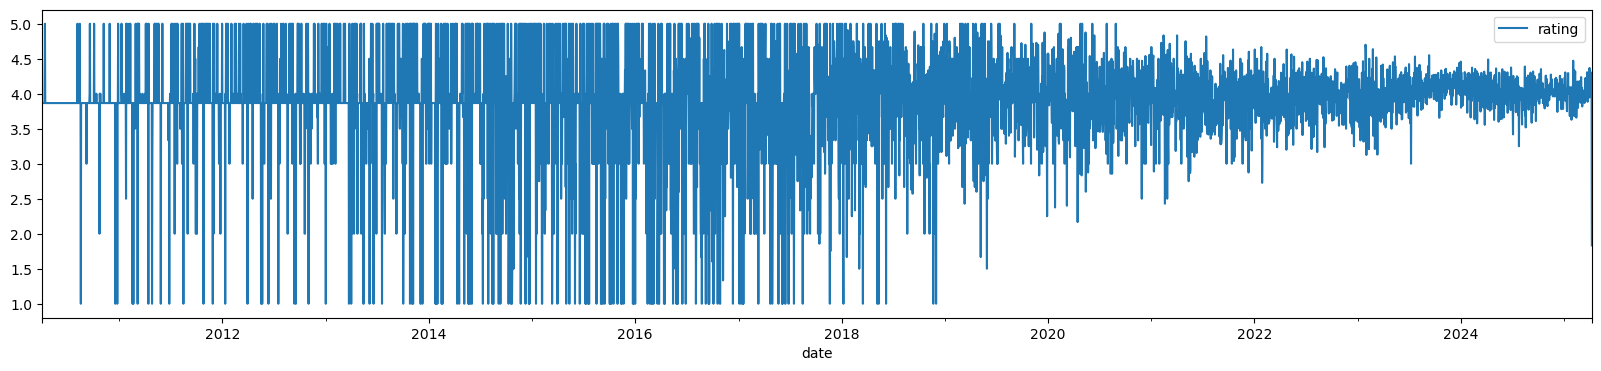

In [149]:
rat.plot(figsize=(20,4))

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 2000x500 with 0 Axes>

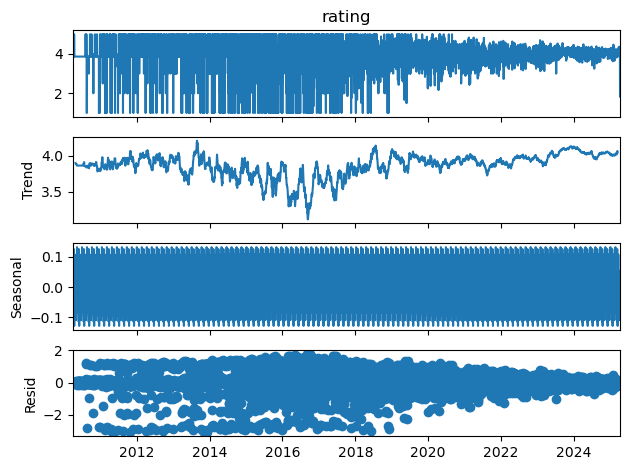

In [151]:
plt.figure(figsize=(20,5))
Components=seasonal_decompose(rat.rating,period=50) 
Components.plot();

In [152]:
print(Components.resid.skew())
print(Components.resid.mean())

-1.3550148486598081
-0.0001528661805569817


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

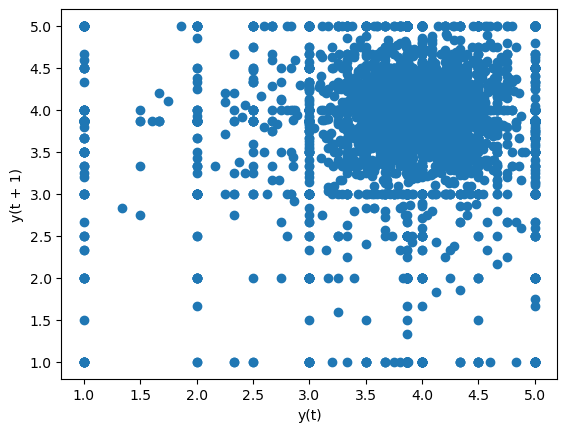

In [153]:
from pandas.plotting import lag_plot
lag_plot(rat,lag=1)

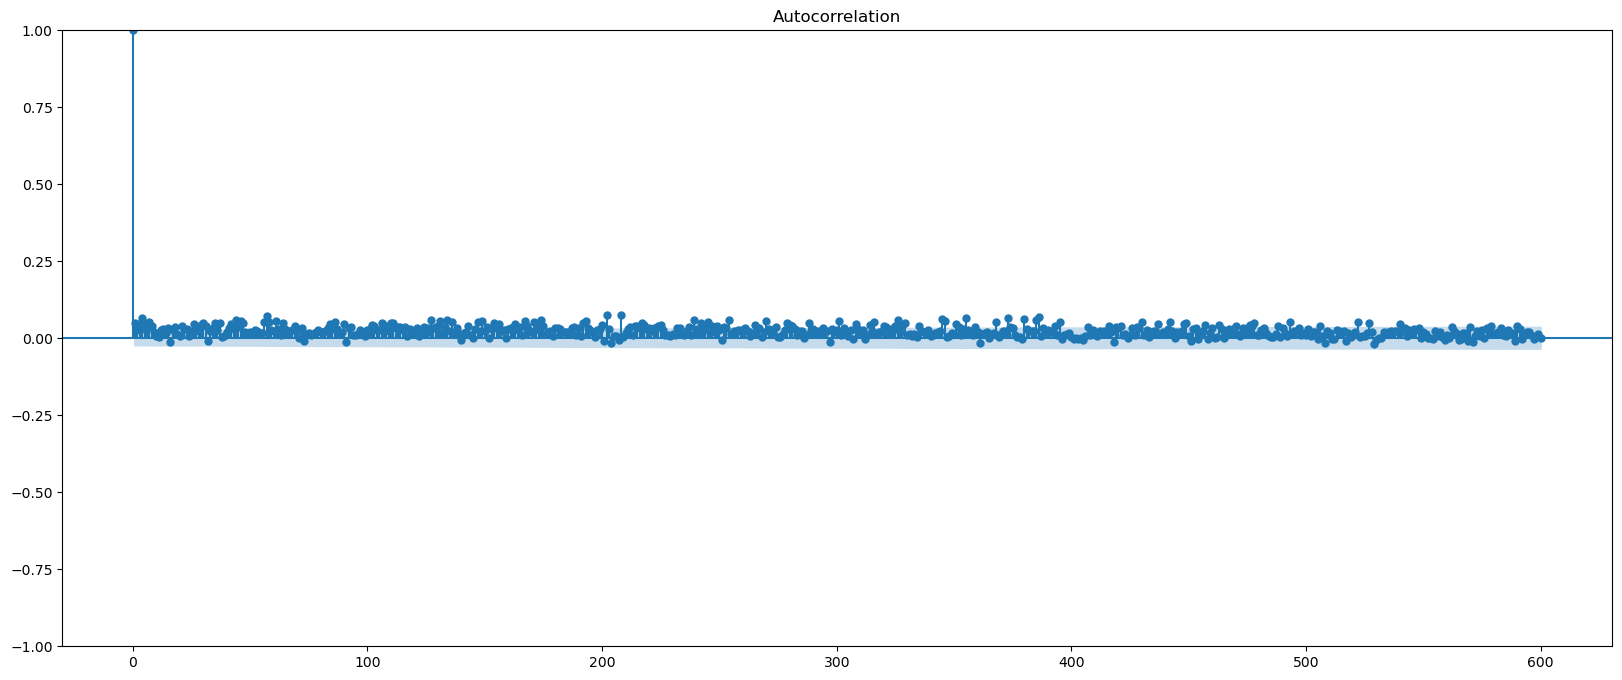

In [154]:
# we can see there is no autocorrel;ation till the end of the data
from statsmodels.graphics.tsaplots import plot_acf
fig,ax=plt.subplots(figsize=(20,8))
plot_acf(rat.rating,lags=600,ax=ax);

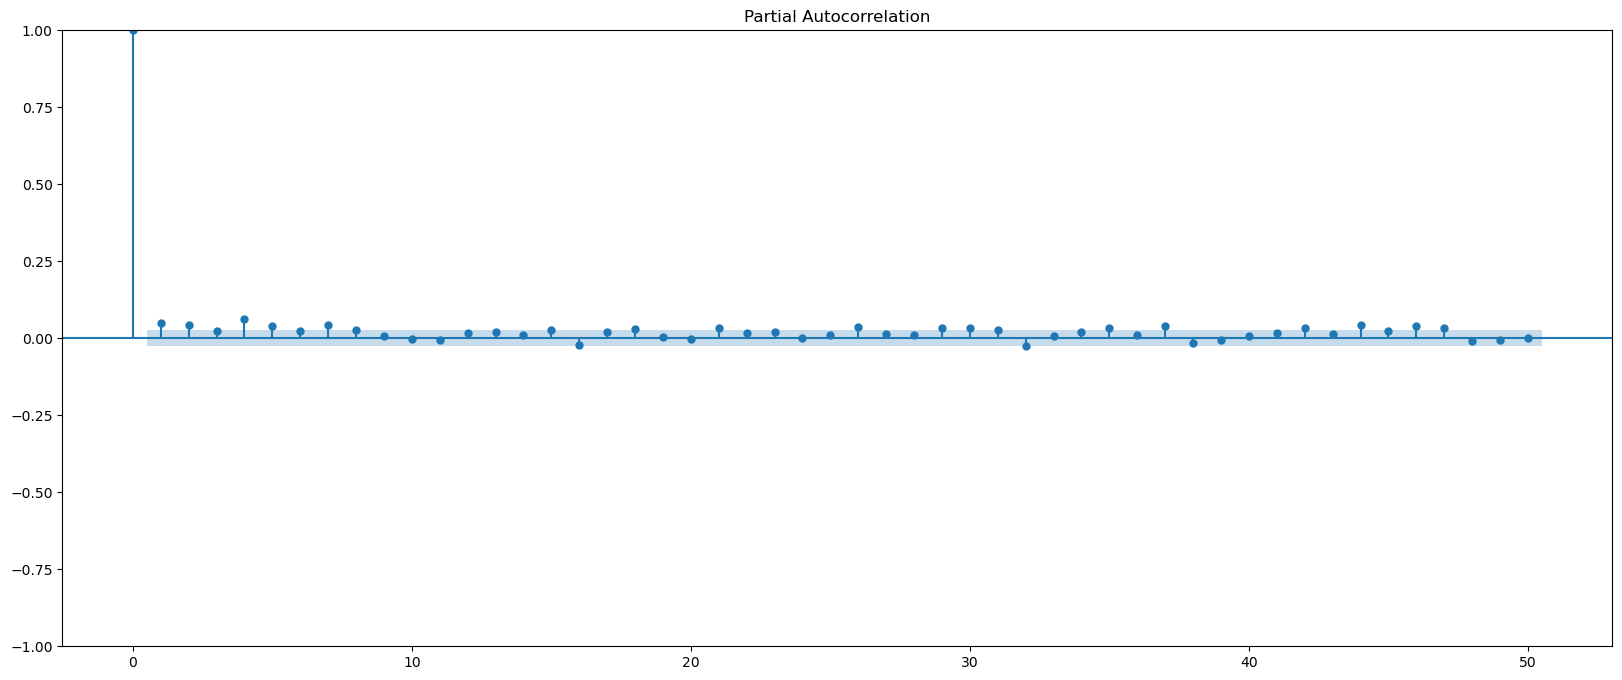

In [155]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax=plt.subplots(figsize=(20,8))
plot_pacf(rat.rating,lags=50,ax=ax);


In [156]:
# lets check for thestationarity using ADF
from statsmodels.tsa.stattools import adfuller
df_test=adfuller(rat)
ad_output=pd.Series(df_test[0:4],index=['Test Statistics','p_value','Lags used','No of obs used'])
for i,j in df_test[4].items():
    ad_output['Critical Values (%s)'%i]=j
print(ad_output)

Test Statistics         -9.746007e+00
p_value                  8.252673e-17
Lags used                3.100000e+01
No of obs used           5.455000e+03
Critical Values (1%)    -3.431549e+00
Critical Values (5%)    -2.862070e+00
Critical Values (10%)   -2.567052e+00
dtype: float64


In [157]:
# because p value is <0.05,data is stationary

In [158]:
X=rat
train_size = int(len(X) * 0.50)
train,test = X[:train_size], X[train_size:]

In [159]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [160]:
def A_rmse(X,pdq):    
    train_size = int(len(X) * 0.50)
    train, test = X[:train_size], X[train_size:]
    A  = ARIMA(train, order=pdq)
    model=A.fit()
    ypred= model.forecast(steps=len(test))        
    rmse =np.sqrt(mean_squared_error(test, ypred)) 
    return rmse


# evaluate combinations of p, d and q values for an ARIMA model
def best_model(df, p_values, d_values, q_values):
    X=data.values.astype('float32')
    best_score, best_cfg = float('inf'), None 
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = A_rmse(X, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [161]:
p_values = range(0,2)
d_values = range(0,1)
q_values = range(0,2)
data=rat.rating
best_model(df,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=0.510
ARIMA(0, 0, 1) RMSE=0.510
ARIMA(1, 0, 0) RMSE=0.510
ARIMA(1, 0, 1) RMSE=0.532
Best ARIMA(1, 0, 0) RMSE=0.510


In [162]:
# random walk
A = ARIMA(train,order=(1,0,0))
ari_model=A.fit()
ypred=ari_model.forecast(steps=len(test))
yforecast=ari_model.forecast(steps=len(test))
rmse =np.sqrt(mean_squared_error(test, ypred)) 
rmse

0.5103735488956528

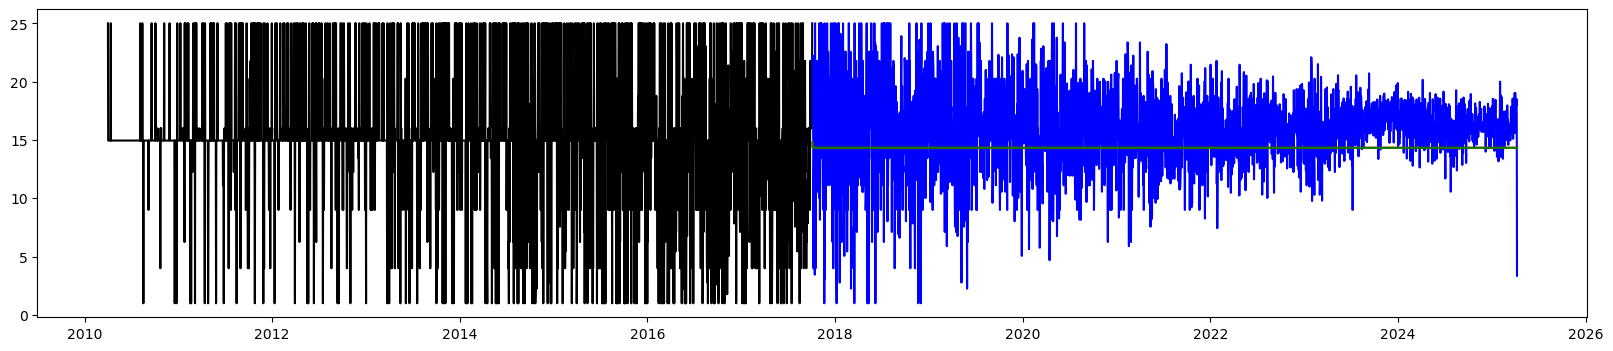

In [163]:
plt.figure(figsize=(20,4))
plt.plot(train**2,color='black')
plt.plot(test**2,color='blue')
plt.plot(ypred**2,color='red')
plt.plot(yforecast**2,color='green')

In [164]:
Train = rat.head(2744)
Test = rat.tail(2744)

In [165]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [166]:
def ExpSm(s,t,p):
    HW=ExponentialSmoothing(Train["rating"],seasonal=s,trend=t,seasonal_periods=p)

    HW_model=HW.fit()

    ypred=HW_model.predict(start=Test.index[0],end=Test.index[-1])

    RMSE=np.sqrt(np.mean((Test.rating-ypred)**2))

    print("RMSE=",RMSE)

In [167]:
ExpSm('add','add',400)

RMSE= 0.6033931594099785


In [168]:
ExpSm('add','mul',400)

RMSE= 0.6039420904050206


In [169]:
ExpSm('mul','mul',400)

RMSE= 0.7496614766023216


In [170]:
ExpSm('mul','mul',350)

RMSE= 0.7562053432845395


In [171]:
ExpSm('mul','mul',500)

RMSE= 0.7752482167613329


### Random Forest and LightGB models

In [173]:
df

,userid,productid,rating,date
0,19800,6501,5,2008-01-08
1,68377,14346,4,2012-03-10
2,3273,29591,5,2013-01-20
3,22312,31598,1,2013-11-25
4,57219,27361,5,2014-06-17
...,...,...,...,...
78240,16932,16243,5,2012-09-11
78241,69246,22851,4,2013-05-03
78242,8768,14414,2,2013-08-01
78243,38853,22565,5,2014-02-19


In [174]:
df=df.drop("date",axis=1)

In [175]:
df

,userid,productid,rating
0,19800,6501,5
1,68377,14346,4
2,3273,29591,5
3,22312,31598,1
4,57219,27361,5
...,...,...,...
78240,16932,16243,5
78241,69246,22851,4
78242,8768,14414,2
78243,38853,22565,5


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [177]:
from sklearn.preprocessing import LabelEncoder
LE_y=LabelEncoder()

In [178]:
X=df.drop("rating",axis=1)
y=df.rating
y=LE_y.fit_transform(df.rating)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [179]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [180]:
RF1=RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1,class_weight='balanced')

In [181]:
RF1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10, n_jobs=-1,
                       random_state=42)

In [182]:
y_pred=RF1.predict(X_test)

In [183]:
accuracy_score(y_test,y_pred)

0.4352993801520864

In [184]:
RF=RandomForestClassifier()

In [185]:
p={'n_estimators':[5,10,15],'max_depth':[3,5,8]}
GS=GridSearchCV(RF,p,cv=3)
GS.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8], 'n_estimators': [5, 10, 15]})

In [186]:
GS.best_params_

{'max_depth': 3, 'n_estimators': 5}

In [187]:
RF2=RandomForestClassifier(n_estimators=3,max_depth=3,random_state=42,n_jobs=-1,class_weight='balanced')

In [188]:
RF2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=3,
                       n_jobs=-1, random_state=42)

In [189]:
y_pred=RF2.predict(X_test)
accuracy_score(y_test,y_pred)

0.29388459326474536

pip install lightgbm

In [191]:
from lightgbm import LGBMClassifier

In [192]:
LG1=LGBMClassifier(n_estimators=10,learning_rate=0.01,random_state=42)

In [193]:
LG1.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62596, number of used features: 2
[LightGBM] [Info] Start training from score -2.148553
[LightGBM] [Info] Start training from score -2.835420
[LightGBM] [Info] Start training from score -2.521281
[LightGBM] [Info] Start training from score -1.659995
[LightGBM] [Info] Start training from score -0.590308


LGBMClassifier(learning_rate=0.01, n_estimators=10, random_state=42)

In [194]:
y_pred=LG1.predict(X_test)
accuracy_score(y_test,y_pred)

0.5541568151319574

In [195]:
LG=LGBMClassifier()

In [196]:
p={'n_estimators':[50,100,15],'learning_rate':[0.25,0.5,0.8]}
GS=GridSearchCV(LG,p,cv=3)
GS.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 41730, number of used features: 2
[LightGBM] [Info] Start training from score -2.148537
[LightGBM] [Info] Start training from score -2.835541
[LightGBM] [Info] Start training from score -2.521365
[LightGBM] [Info] Start training from score -1.659937
[LightGBM] [Info] Start training from score -0.590306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 41731, number of used features: 2
[LightGBM] [Info] Start training from score -2.148561
[LightGBM] [Info] Start training from score -2.835564
[LightGBM] [Info] Start training from score -2.5

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.25, 0.5, 0.8],
                         'n_estimators': [50, 100, 15]})

In [197]:
GS.best_params_

{'learning_rate': 0.25, 'n_estimators': 15}

In [198]:
LG2=LGBMClassifier(n_estimators=50,learning_rate=0.25,random_state=42)

In [199]:
LG2.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62596, number of used features: 2
[LightGBM] [Info] Start training from score -2.148553
[LightGBM] [Info] Start training from score -2.835420
[LightGBM] [Info] Start training from score -2.521281
[LightGBM] [Info] Start training from score -1.659995
[LightGBM] [Info] Start training from score -0.590308


LGBMClassifier(learning_rate=0.25, n_estimators=50, random_state=42)

In [200]:
y_pred=LG2.predict(X_test)
accuracy_score(y_test,y_pred)

0.5528787781966898

### dumping the models

In [202]:
import pickle as pickle

In [203]:
AA = ARIMA(rat,order=(1,0,0))
ari=AA.fit()

In [204]:
with open('ari.pkl','wb') as f:
    pickle.dump(ari,f)

In [205]:
with open('ari.pkl','rb') as f:
    ari=pickle.load(f)

In [206]:
with open('RF2.pkl','wb') as f:
    pickle.dump(RF2,f)

In [207]:
with open('RF2.pkl','rb') as f:
    RF2 =pickle.load(f)

In [208]:
with open('LG2.pkl','wb') as f:
    pickle.dump(LG2,f) 

In [209]:
with open('LG2.pkl','rb') as f:
    LG2 =pickle.load(f)

In [210]:
with open('LE_uid.pkl','wb') as f:
    pickle.dump(LE_uid,f) 

In [211]:
with open('LE_uid.pkl','rb') as f:
    LE_uid=pickle.load(f)

In [212]:
with open('LE_pid.pkl','wb') as f:
    pickle.dump(LE_pid,f) 

In [213]:
with open('LE_pid.pkl','rb') as f:
    LE_pid=pickle.load(f)

In [214]:
with open('LE_y.pkl','wb') as f:
    pickle.dump(LE_y,f) 

In [215]:
with open('LE_y.pkl','rb') as f:
    LE_y=pickle.load(f)

In [216]:
ypred=ari.predict(steps=500)
yforecast=ari.forecast(steps=500)

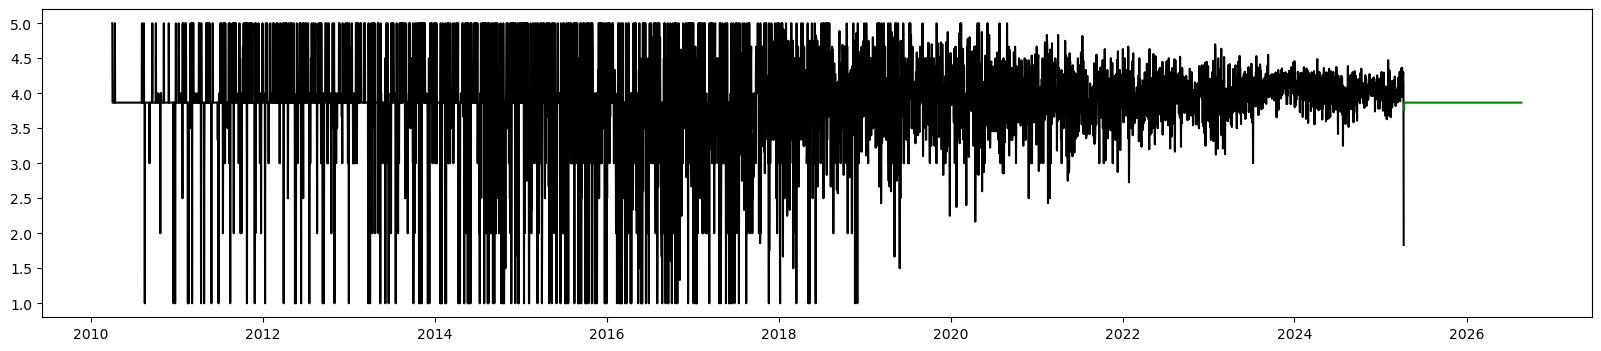

In [217]:
plt.figure(figsize=(20,4))
plt.plot(rat,color='black')
plt.plot(yforecast,color='green')

In [218]:
ypredict=RF2.predict(np.array([LE_uid.transform(['A3TV7QFYXAG130']),LE_pid.transform(['B0069R7TAM'])]).reshape(1,2))
LE_y.inverse_transform(ypredict)[0]

5

In [219]:
ypredict=LG2.predict(X.iloc[[4]])
LE_y.inverse_transform(ypredict)[0]

5